Morning Session

In [18]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [19]:
df=pd.read_csv(r"C:\Users\appus\Downloads\agricultural sustainability.csv")
df.head

<bound method NDFrame.head of      soil_health   crop_yield  water_usage  carbon_footprint  fertilizer_use  \
0       0.374540  6778.284815   964.057410        126.020778      226.809659   
1       0.950714  1757.259685  4561.488080        175.365653       88.134761   
2       0.731994  2454.658427  2773.635676        129.654718      194.072090   
3       0.598658  9086.987697  4219.058597         89.916140      201.678762   
4       0.156019  6457.861537  1940.223205        104.286142      156.032668   
..           ...          ...          ...               ...             ...   
195     0.349210  9376.815930  2632.827381        442.455759       72.895518   
196     0.725956  8725.714767  3504.009823        469.453227      279.328394   
197     0.897110  4860.946246  1275.439420        304.309933       84.204658   
198     0.887086  7757.839610  1365.300585        363.492871      287.559338   
199     0.779876  7790.885867   683.908773        465.124722      161.501443   

     sust

In [20]:
df.tail()

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
195,0.349210,9376.815930,2632.827381,442.455759,72.895518,0
196,0.725956,8725.714767,3504.009823,469.453227,279.328394,0
197,0.897110,4860.946246,1275.439420,304.309933,84.204658,0
198,0.887086,7757.839610,1365.300585,363.492871,287.559338,0
199,0.779876,7790.885867,683.908773,465.124722,161.501443,0


In [21]:
df.columns

Index(['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use', 'sustainability'],
      dtype='object')

In [22]:
df['sustainability'].unique()

array([0, 1])

In [23]:
df.shape

(200, 6)

In [24]:
#feature and target selection
X = df[['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use']]
y = df['sustainability']

In [25]:
X.shape

(200, 5)

In [26]:
y.shape

(200,)

In [27]:
#training and testing set split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=11)

In [28]:
X_train.shape

(160, 5)

In [29]:
X_test.shape

(40, 5)

In [31]:
#instantiate the model -RFC
model = RandomForestClassifier(n_estimators=100, random_state=100)

In [32]:
#train the model
model.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [33]:
#prediction
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
len(y_pred)

40

In [35]:
# evaluate the model
acc=accuracy_score(y_test,y_pred)
print(f'The accuracy score for RFC is{acc*100:.2f}%')

The accuracy score for RFC is100.00%


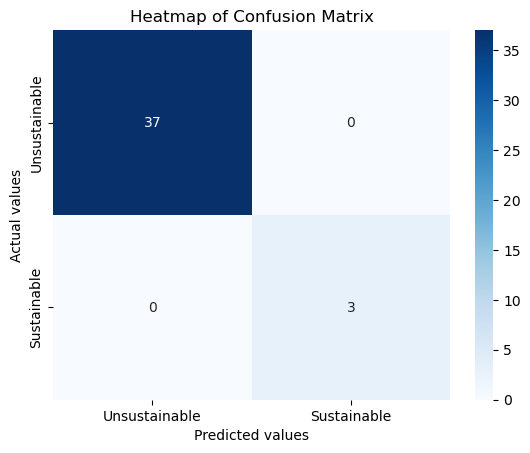

In [38]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=['Unsustainable','Sustainable'],yticklabels=['Unsustainable','Sustainable'])
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [39]:
#classification report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [40]:
#save the model
import joblib
joblib.dump(model,'RF_Model.pkl')

['RF_Model.pkl']